#Détection de la reine des abeilles
Ici on essaie de détecter la présence d'abeilles à partir des images ou de flux vidéo.

#Téléchargement des fichier nécessaire et installation des dépendances
Ici on va télécharger notre _"dataset"_ ainsi que les programme nécessaire pour la détection de la reine d'abeille. Cliquez sur l'icône dossier sur le côté gauche pour afficher nos répertoires.

In [ ]:
!pwd

/content/QueenBee


In [1]:
!git clone -b main https://github.com/ferio06/QueenBee.git  #Télécharger le répertoire contenant les codes de notre projet depuis github
%cd QueenBee/
!unzip DataBaseQueen.zip; rm DataBaseQueen.zip
#!mkdir weights
!mkdir inference
%cd weights/
!gdown --id 1fWVQaJ_aL62Tvttr_iyl-IDGRRcGFBio #télécharger notre fichier weight depuis google drive
%cd ..
!pip install -qr /content/QueenBee/requirements.txt  # install dependencies (ignore errors)

import torch
from IPython.display import Image, clear_output  # pour afficher les images
from utils.google_utils import gdrive_download  # pour télécharger les models/datasets

#clear_output()

print('Ici on utilise torch %s \n \nMateriel utiliser : \n   > %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'QueenBee'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 288 (delta 13), reused 0 (delta 0), pack-reused 253
Receiving objects: 100% (288/288), 86.87 MiB | 30.31 MiB/s, done.
Resolving deltas: 100% (105/105), done.
/content/QueenBee
Archive:  DataBaseQueen.zip
  inflating: data.yaml               
   creating: test/
   creating: test/images/
  inflating: test/images/beeE_19_jpg.rf.8699befc9801cd2d3a7cc2ffd783c986.jpg  
  inflating: test/images/beeE_56_jpg.rf.30f82936a3d05f16969407429a90e3f7.jpg  
  inflating: test/images/beeE_5_jpg.rf.f87c9bc8596f9695928225fdb2bd4b54.jpg  
  inflating: test/images/bee_103_jpg.rf.d9aa1762ac0d6056872ad2577a297338.jpg  
  inflating: test/images/bee_111_jpg.rf.0dae12dc050b2819703aa87caa6d51db.jpg  
  inflating: test/images/bee_148_jpg.rf.e25a26abd85fb5973f436f38ecf79a2b.jpg  
  inflating: test/images/bee_174_jpg.rf.448a637b776af1db5609793b

# Lancer la détection

Le répertoire où l'on ajoute les images ou vidéo que l'on va détecter se trouve dans le dossier _"test/images"_. Ici on a utilisé les images contenues dans notre test du dataset que l'on a construit. Mais on peut aussi bien ajouter d'autre fichier vidéo ou image dans le répertoire manuellement pour que celle-ci va faire objet de détection pour la reine d'abeille.
Pour cela on clique droite sur le dossier images du répertoire test et sélectionne Upload et le fichier qu'on veut détecter la reine des abeilles.
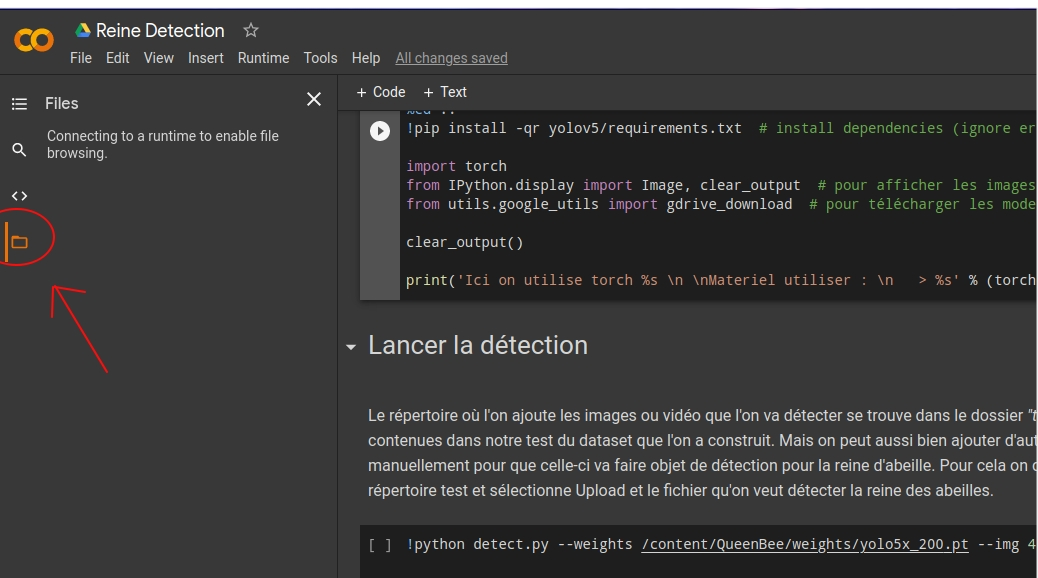
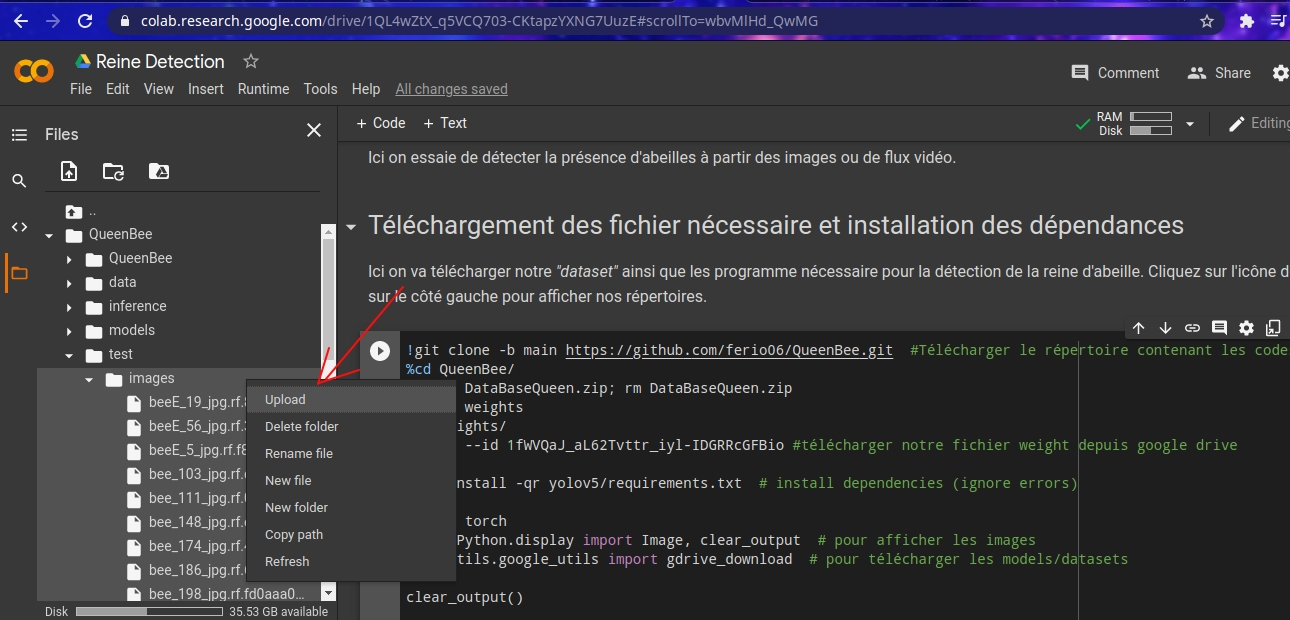


In [ ]:
!python detect.py --weights /content/QueenBee/weights/yolo5x_200.pt --img 416 --conf 0.4 --source /content/QueenBee/test/images


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/QueenBee/test/images', update=False, view_img=False, weights=['/content/QueenBee/weights/yolo5x_200.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Fusing layers... 
Model Summary: 484 layers, 88397343 parameters, 0 gradients
image 1/24 /content/QueenBee/test/images/beeE_19_jpg.rf.8699befc9801cd2d3a7cc2ffd783c986.jpg: 416x416 6 bees, 1 queens, Done. (0.037s)
image 2/24 /content/QueenBee/test/images/beeE_56_jpg.rf.30f82936a3d05f16969407429a90e3f7.jpg: 416x416 3 bees, 1 queens, Done. (0.037s)
image 3/24 /content/QueenBee/test/images/beeE_5_jpg.rf.f87c9bc8596f9695928225fdb2bd4b54.jpg: 416x416 4 bees, 2 queens, Done. (0.037s)
image 4/24 /content/QueenBee/test/images/bee_103_jpg.rf.d9aa1762ac0d6056872ad2577a297338.jpg: 416x416 8 bees, 1 queens, Done. (0.037s)
image 5/

#Afficher les résultats 
Ici on affiche les résultats de la détection de la reine des abeilles sur des images que l'on a pris à partir du testset de notre dataset.

Notons que les résulats qu'on affiches ici sont des jpg, ils sont également téléchargeable depuis le répertoire _"interference/output"_

In [ ]:
!pwd

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/QueenBee/inference/output/*.jpg'): #en assumant qu'ils sont au format JPG
    display(Image(filename=imageName))
    print("\n")